In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

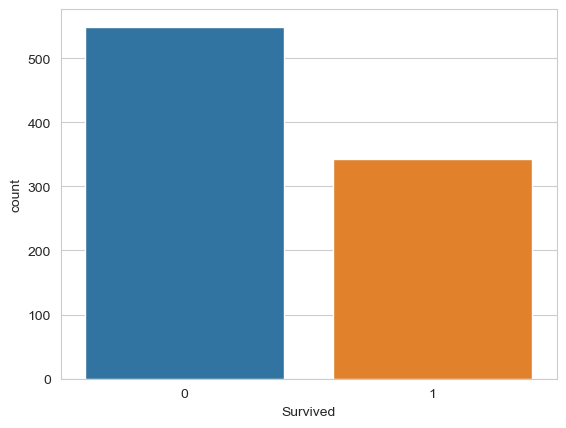

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

Text(0.5, 1.0, 'Survival Count by Sex')

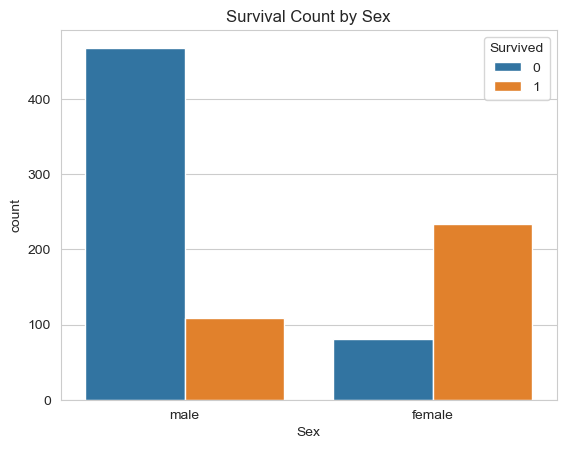

In [15]:
sns.set_style('whitegrid')
sns.countplot(x="Sex", hue= "Survived", data= df)
plt.title("Survival Count by Sex")

Text(0.5, 1.0, 'Survival Count by Passenger Class')

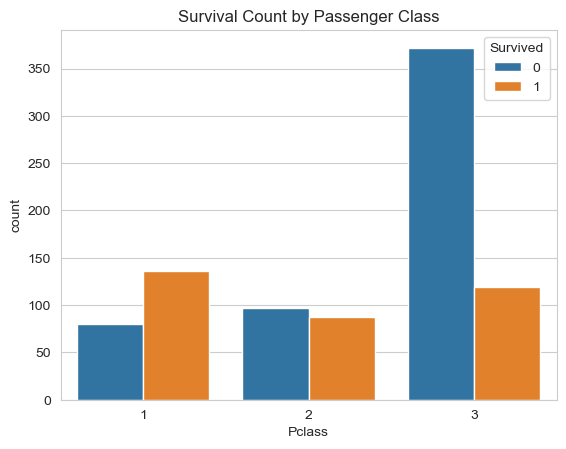

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival Count by Passenger Class")

Text(0.5, 1.0, 'Survival Count by Embarkation Port')

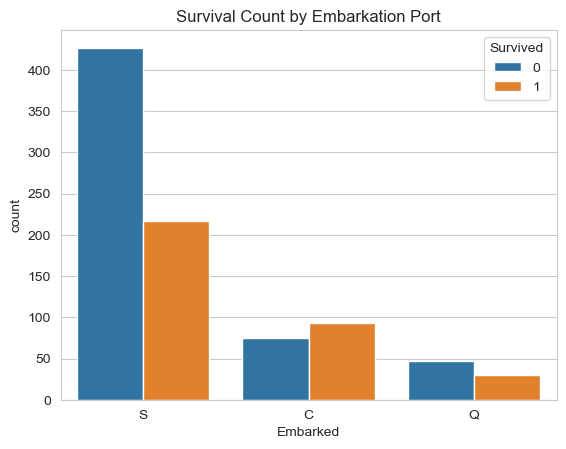

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title("Survival Count by Embarkation Port")

Text(0.5, 1.0, 'Age Distribution by Survival')

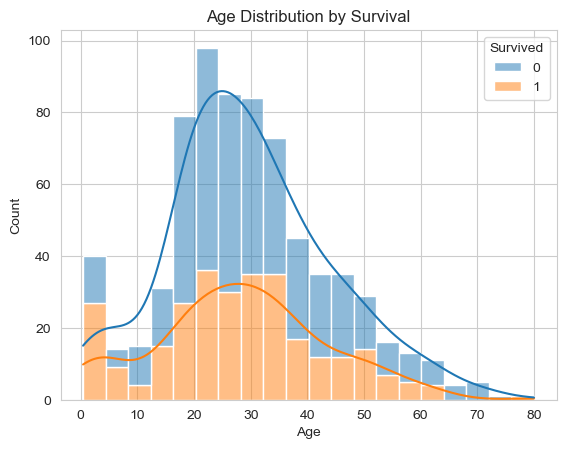

In [19]:
# Analyze 'Age' vs 'Survived'
sns.histplot(x='Age', hue='Survived', data=df, kde=True, multiple='stack')
plt.title("Age Distribution by Survival")

Text(0.5, 1.0, 'Fare Distribution by Survival')

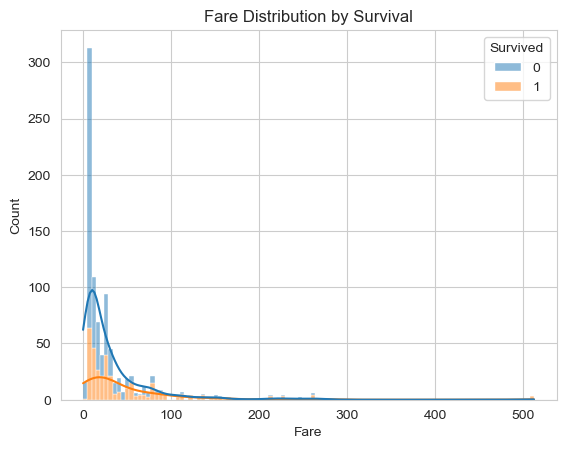

In [20]:
sns.histplot(x='Fare', hue='Survived', data=df, kde=True, multiple='stack')
plt.title("Fare Distribution by Survival")

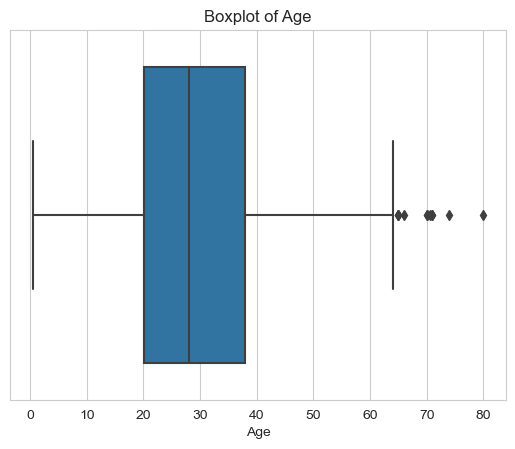

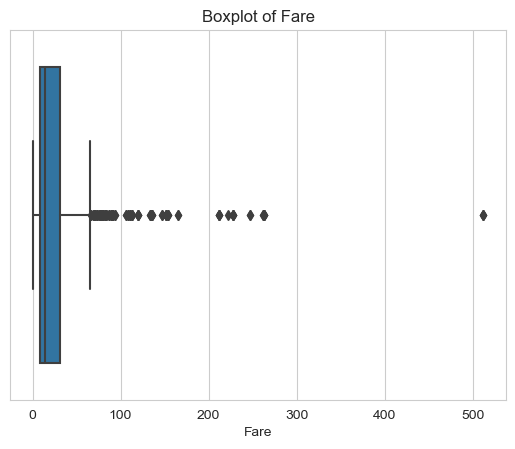

In [23]:
# Outliers
sns.boxplot(x='Age', data=df)
plt.title("Boxplot of Age")
plt.show()

sns.boxplot(x='Fare', data=df)
plt.title("Boxplot of Fare")
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

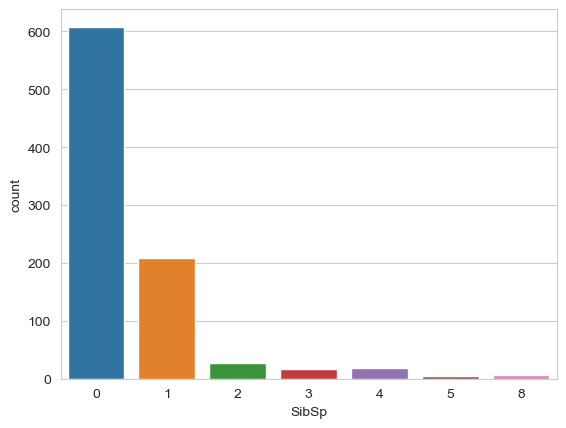

In [10]:
sns.countplot(x='SibSp',data=df)

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This indicates that the columns "Age" and "Cabin" contain significant null values, while the "Embarked" column also has null values, but to a much lesser extent.

In [6]:
# Dropping the "Cabin" column because of large number of null values
df = df.drop(columns='Cabin', axis=1)

Replacing missing values of "Age" with the mean value:

In [7]:
age_mean = df["Age"].mean()
df["Age"].fillna(age_mean, inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
